<a href="https://colab.research.google.com/github/moroq2/AI-2024-S2/blob/main/2024_S2_ConvNeXtLarge_r24_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#画像データに対して、10種類のラベルの1つを割り当てるモデルを作成していただきます

画像認識とは、画像および動画から文字や顔などのオブジェクトや特徴を認識し検出するパターン認識技術の一分野です。特に画像に対してラベルを割り当てる画像分類は画像認識の領域においてポピュラーな研究分野となっていて、最近は深層学習が圧倒的な精度を達成しています。今回は犬や猫などの動物や車などの無機物が写った画像に対して10種類のラベルから一つ割り当てる問題に挑戦していただきます。

本コンペを活用して、データ解析・モデル構築を体験してください。

データ概要

課題種別：分類
データ種別：画像
学習データサンプル数：5,000
画像の大きさ：96×96

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Num GPUs Available:  1
Mixed Precision Policy: <DTypePolicy "mixed_float16">
Found 4000 validated image filenames belonging to 10 classes.
Found 1000 validated image filenames belonging to 10 classes.
785596384/785596384 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - accuracy: 0.5257 - loss: 1.8632 - val_accuracy: 0.9810 - val_loss: 0.7405 - learning_rate: 1.0000e-04
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.9034 - loss: 0.9111 - val_accuracy: 0.9830 - val_loss: 0.7364 - learning_rate: 1.0000e-04
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.9330 - loss: 0.8274 - val_accuracy: 0.9830 - val_loss: 0.7061 - learning_rate: 1.0000e-04
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.9447 - loss: 0.7794 - val_accuracy: 0.9850 - val_loss: 0.6807 - learning_rate: 1.0000e-04
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.9551 - loss: 0.7693 - val_accuracy: 0.9870 - val_loss: 0.6766 - learning_rate: 1.0000e-04
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.9589 - loss: 0.7434 - val_accuracy: 0.9860 - val_loss: 0.6567 - learning_rate: 1.0000e-04
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/st

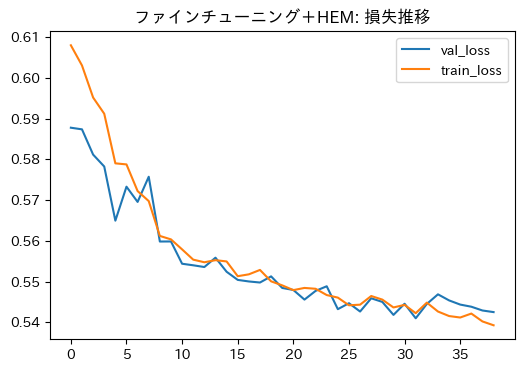

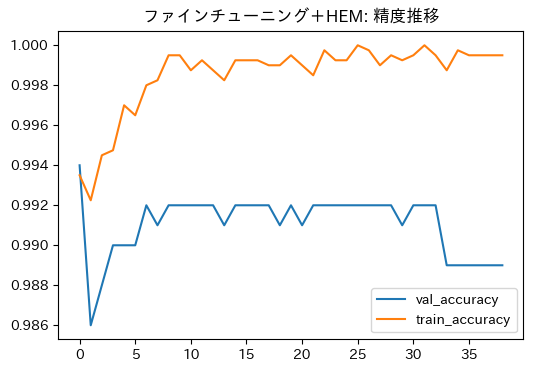

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9942 - loss: 0.5343

=== HEM 後バリデーション ===
Acc: 0.9920  Loss: 0.5410
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step


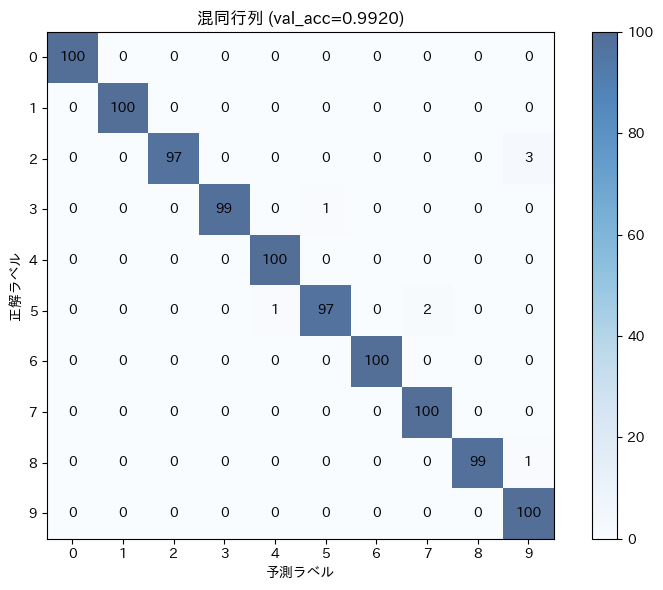

Found 8000 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step
提出ファイル作成: /content/drive/MyDrive/Colab Notebooks/AI_2024_S2/submission_convnextL_192_HEM_0424_r1.tsv


In [ ]:
# ========================================
# Google Colab 上で GPU を使用する想定
# ========================================
# 1. Google Drive をマウント
from google.colab import drive
drive.mount('/content/drive')

# 2. 日本語表示ライブラリ
!pip install -q japanize_matplotlib
import japanize_matplotlib

# 3. GPU 確認
import tensorflow as tf, os, numpy as np, pandas as pd, matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# 4. Mixed Precision
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')
print("Mixed Precision Policy:", tf.keras.mixed_precision.global_policy())

# 5. パス設定
base_dir = "/content/drive/MyDrive/Colab Notebooks/AI_2024_S2"

# 6. ライブラリ
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.activations import swish
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# --- ★ ConvNeXtLarge を読み込み
from tensorflow.keras.applications.convnext import ConvNeXtLarge, preprocess_input as preprocess_convnext

# --------------------------
# ハイパーパラメータ
# --------------------------
BATCH_SIZE  = 8
TARGET_SIZE = (192, 192)           # ConvNeXtLarge は 224/384 が推奨だが 192 でも可
INPUT_SHAPE = (*TARGET_SIZE, 3)
NUM_CLASSES = 10
HEM_THRESHOLD = 0.70
HEM_DUP       = 3

# --------------------------
# 7. データ解凍
# --------------------------
if not os.path.exists("train_images"):
    os.system(f"unzip -q '{base_dir}/train_images.zip'")
    os.system(f"unzip -q '{base_dir}/test_images.zip'")
    for fname in ["label_master.tsv", "sample_submit.tsv", "train_master.tsv"]:
        os.system(f"cp '{base_dir}/{fname}' .")

train_master = pd.read_csv('train_master.tsv', sep='\t')
label_master = pd.read_csv('label_master.tsv', sep='\t')
train_master['label_id'] = train_master['label_id'].astype(str)

# =========================================================
# 8. データジェネレータ
# =========================================================
def create_generators(preprocess_func,
                      batch_size=BATCH_SIZE,
                      target_size=TARGET_SIZE,
                      test_size=0.2):
    train_df, val_df = train_test_split(
        train_master, test_size=test_size, random_state=3,
        stratify=train_master['label_id']
    )

    datagen_train = ImageDataGenerator(
        rotation_range=35, width_shift_range=0.1, height_shift_range=0.1,
        shear_range=0.1, zoom_range=[0.9, 1.1],
        #horizontal_flip=True, vertical_flip=True,
        brightness_range=[1.0, 1.5], channel_shift_range=50.0,
        fill_mode='reflect',
        preprocessing_function=preprocess_func
    )
    datagen_val = ImageDataGenerator(preprocessing_function=preprocess_func)

    train_gen = datagen_train.flow_from_dataframe(
        train_df, "train_images", x_col='file_name', y_col='label_id',
        target_size=target_size, batch_size=batch_size,
        class_mode='categorical', shuffle=True, seed=14
    )
    val_gen = datagen_val.flow_from_dataframe(
        val_df, "train_images", x_col='file_name', y_col='label_id',
        target_size=target_size, batch_size=batch_size,
        class_mode='categorical', shuffle=False, seed=15
    )
    return train_gen, val_gen, train_df, val_df, datagen_train, datagen_val

# =========================================================
# 9. ConvNeXtLarge モデル
# =========================================================
def build_convnextlarge_model(input_shape=INPUT_SHAPE,
                              num_classes=NUM_CLASSES,
                              train_base=False):
    base_model = ConvNeXtLarge(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'           # ★
    )
    for layer in base_model.layers:
        layer.trainable = train_base

    x = GlobalAveragePooling2D()(base_model.output)
    x = BatchNormalization()(x)
    x = Dense(256, activation=swish)(x)
    x = Dropout(0.6)(x)
    outputs = Dense(num_classes, activation='softmax', dtype='float32')(x)
    return Model(base_model.input, outputs)

loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

# =========================================================
# 10. 初期学習
# =========================================================
train_gen, val_gen, train_df, val_df, datagen_train, datagen_val = create_generators(
    preprocess_func=preprocess_convnext)    # ★

model = build_convnextlarge_model()

model.compile(tf.keras.optimizers.AdamW(1e-4, weight_decay=1e-5),
              loss=loss_fn, metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_model_stage1.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)
]

history1 = model.fit(train_gen, epochs=50, validation_data=val_gen,
                     callbacks=callbacks, steps_per_epoch=len(train_gen))

# =========================================================
# 11. ファインチューニング（最後の 50 層を解凍）
# =========================================================
for layer in model.layers[-50:]:
    layer.trainable = True

model.compile(tf.keras.optimizers.AdamW(1e-4, weight_decay=1e-5),
              loss=loss_fn, metrics=['accuracy'])

ft_callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_model_stage2_finetune.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)
]

history2 = model.fit(train_gen, epochs=50, validation_data=val_gen,
                     callbacks=ft_callbacks, steps_per_epoch=len(train_gen))

# ---------------------------------------------------------
# 13. 学習曲線
# ---------------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(history2.history['val_loss'], label='val_loss')
plt.plot(history2.history['loss'], label='train_loss')
plt.title('ファインチューニング＋HEM: 損失推移')
plt.legend(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.title('ファインチューニング＋HEM: 精度推移')
plt.legend(); plt.show()

# ---------------------------------------------------------
# 14. バリデーション評価 & 混同行列
# ---------------------------------------------------------
val_gen.reset()
val_loss, val_acc = model.evaluate(val_gen, verbose=1)
print(f"\n=== HEM 後バリデーション ===\nAcc: {val_acc:.4f}  Loss: {val_loss:.4f}")

val_pred = model.predict(val_gen, verbose=1)
val_pred_cls = np.argmax(val_pred, 1)
cm = confusion_matrix(val_gen.classes, val_pred_cls)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues', alpha=0.7)
plt.title(f'混同行列 (val_acc={val_acc:.4f})')
plt.colorbar()
ticks = np.arange(NUM_CLASSES)
plt.xticks(ticks, ticks); plt.yticks(ticks, ticks)
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.xlabel('予測ラベル'); plt.ylabel('正解ラベル')
plt.tight_layout(); plt.show()

# =========================================================
# 15. テスト推論 & 提出ファイル
# =========================================================
test_files = os.listdir("test_images")
test_df = pd.DataFrame({'file_name': test_files})

test_gen = ImageDataGenerator(preprocessing_function=preprocess_convnext).flow_from_dataframe(
    test_df, "test_images", x_col='file_name', y_col=None,
    target_size=TARGET_SIZE, class_mode=None,
    batch_size=BATCH_SIZE, shuffle=False)

test_pred = model.predict(test_gen, verbose=1)
submit = pd.DataFrame({
    'file_name': test_files,
    'label_id' : np.argmax(test_pred, 1)
})
submit['file_num'] = submit['file_name'].str.extract(r'(\d+)').astype(int)
submit = submit.sort_values('file_num').drop('file_num', axis=1)

out_path = f"{base_dir}/submission_convnextL_192_HEM_0424_r1.tsv"   # ★
submit.to_csv(out_path, sep='\t', index=False, header=False)
print(f"提出ファイル作成: {out_path}")
